# Import Some libraries to use it in our project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Read data from csv file from device using pandas

In [2]:
data = pd.read_csv(r'F:\LEVEL 3 2\Data Computation\Project\letter-recognition.csv')
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
data.shape

(20000, 17)

# Data Cleaning

### check null values

In [4]:
#null value checking
data.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [5]:
#our data has no null value but we make sure more 
df_cleaned = data.dropna()
df_cleaned

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [6]:
#the same shape as the orignal as we have no null values
df_cleaned.shape

(20000, 17)

### check duplicated values

In [7]:
data.duplicated().sum()

1332

In [8]:
# Remove duplicates from the DataFrame
df_cleaned = data.drop_duplicates()

# Verify the number of duplicates removed
num_duplicates_removed = len(data) - len(df_cleaned)
print("Number of duplicates removed:", num_duplicates_removed)

Number of duplicates removed: 1332


In [9]:
df_cleaned.shape

(18668, 17)

In [10]:
df_cleaned

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,T,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4


# Exploratory Data Analysis (EDA) 

### Return some information about our column

In [11]:
columns = df_cleaned.columns
columns

Index(['letter', 'xbox ', 'ybox ', 'width ', 'height', 'onpix ', 'xbar ',
       'ybar ', 'x2bar', 'y2bar ', 'xybar ', 'x2ybar', 'xy2bar', 'xedge ',
       'xedgey', 'yedge ', 'yedgex'],
      dtype='object')

In [12]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18668 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  18668 non-null  object
 1   xbox    18668 non-null  int64 
 2   ybox    18668 non-null  int64 
 3   width   18668 non-null  int64 
 4   height  18668 non-null  int64 
 5   onpix   18668 non-null  int64 
 6   xbar    18668 non-null  int64 
 7   ybar    18668 non-null  int64 
 8   x2bar   18668 non-null  int64 
 9   y2bar   18668 non-null  int64 
 10  xybar   18668 non-null  int64 
 11  x2ybar  18668 non-null  int64 
 12  xy2bar  18668 non-null  int64 
 13  xedge   18668 non-null  int64 
 14  xedgey  18668 non-null  int64 
 15  yedge   18668 non-null  int64 
 16  yedgex  18668 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [13]:
# Print the unique elements in the 'letter' column
print(df_cleaned['letter'].unique())

# Count the number of unique elements in the 'letter' column
print(len(df_cleaned['letter'].unique()),'class')

['T' 'I' 'D' 'N' 'G' 'S' 'B' 'A' 'J' 'M' 'X' 'O' 'R' 'F' 'C' 'H' 'W' 'L'
 'P' 'E' 'V' 'Y' 'Q' 'U' 'K' 'Z']
26 class


### Return some statistic information about our column

In [14]:
df_cleaned.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000
mean,4.150793,7.244322,5.279891,5.506910,3.660596,6.919381,7.529409,4.584637,5.201361,8.353171,6.452700,7.924577,3.131455,8.351832,3.796872,7.784390
std,1.879428,3.187660,1.934960,2.178292,2.160555,2.032226,2.319834,2.625714,2.320102,2.468905,2.624673,2.106957,2.323901,1.574853,2.540271,1.657358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.000000
50%,4.000000,8.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,4.000000,8.000000
75%,5.000000,10.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,9.000000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000


### Show Distribution Plot of Letters

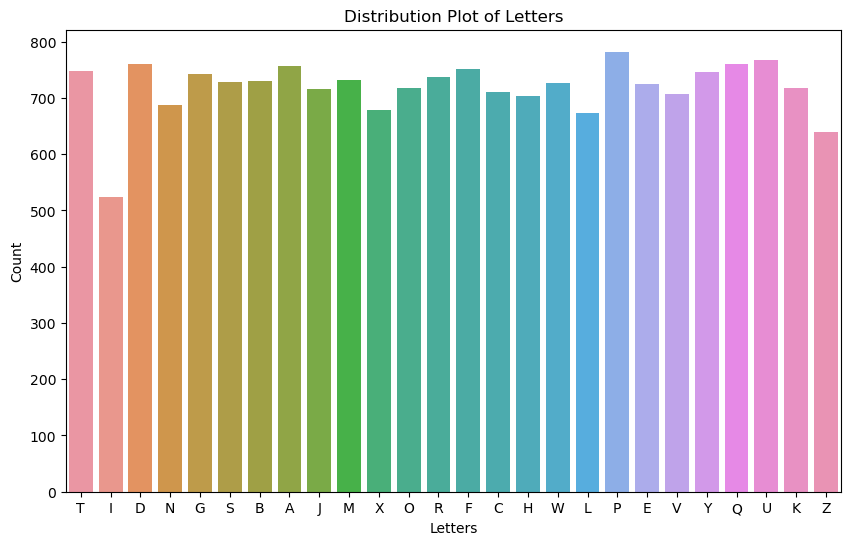

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='letter', data=df_cleaned)
plt.title('Distribution Plot of Letters')
plt.xlabel('Letters')
plt.ylabel('Count')
plt.show()

### Visual representation of a selection of handwritten letters from the dataset

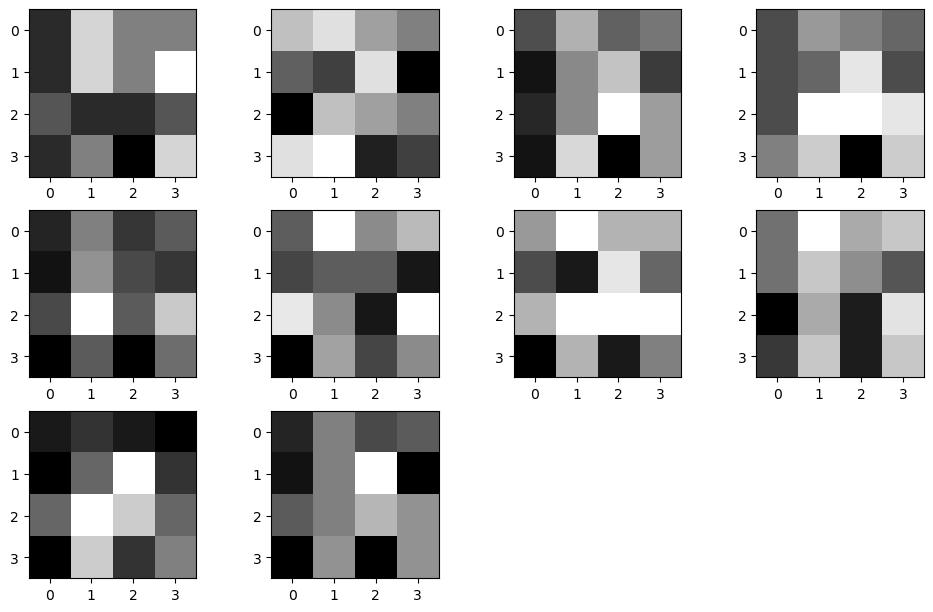

In [16]:
plt.figure(figsize=(12,10))
x_cor, y_cor = 4, 4
for i in range(10):  
    arr_img = np.asarray(df_cleaned.iloc[:, 1:].iloc[4000:, :].values[i].reshape((4,4)))
    plt.subplot(y_cor, x_cor, i+1)
    plt.imshow(arr_img, interpolation='nearest')
    plt.imshow(arr_img, cmap='gray')
plt.show()

### heatmap representation of how the average values of each feature vary across different letters in the dataset.

<Axes: ylabel='letter'>

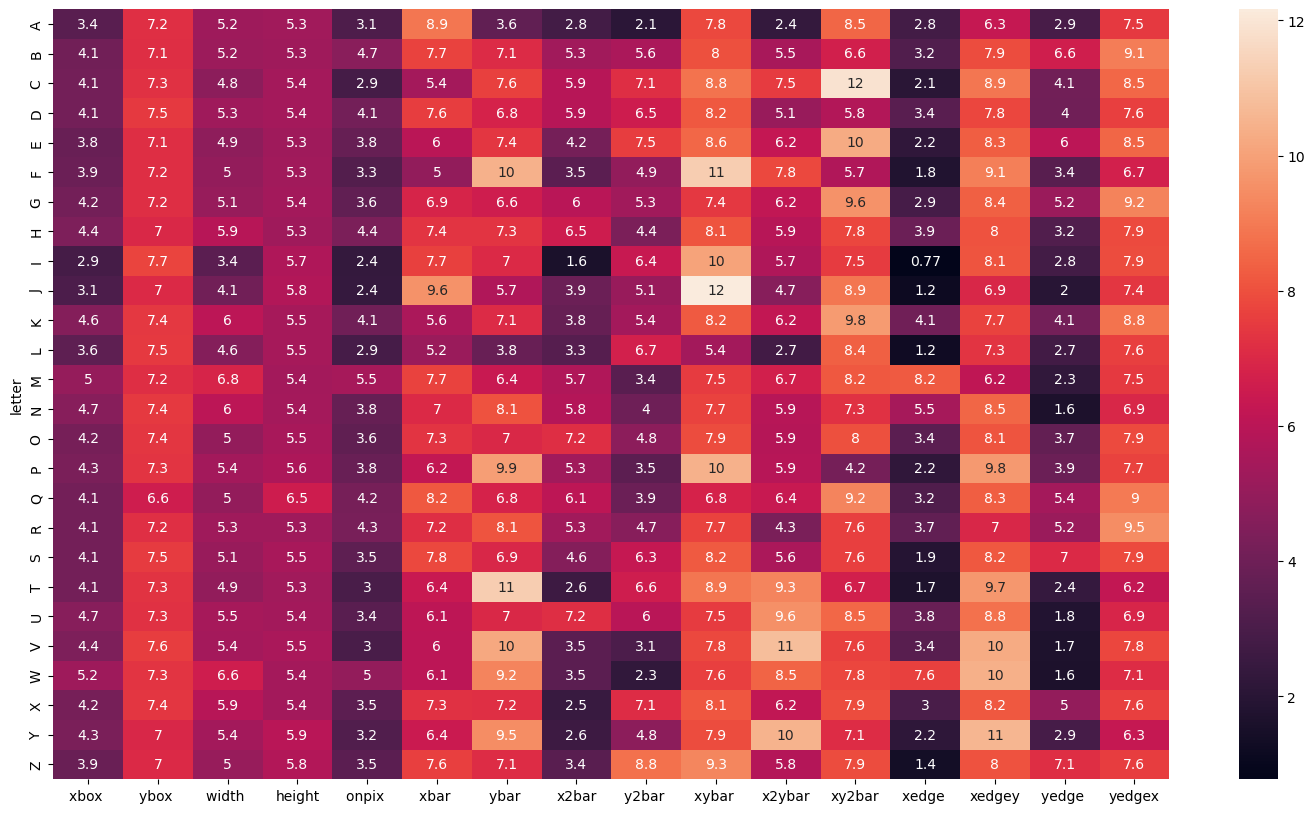

In [17]:
plt.figure(figsize=(18,10))
sns.heatmap(df_cleaned.groupby('letter').mean(),annot=True)

### Visual representation of the correlation between different features in the dataset

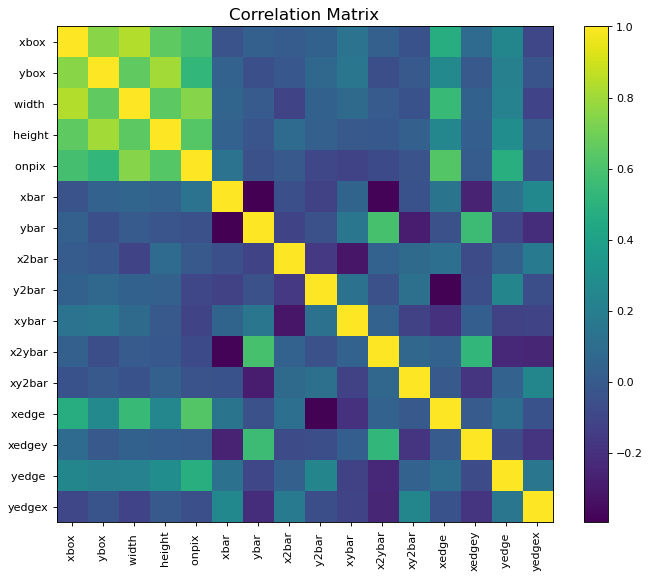

In [18]:
corr = df_cleaned.drop(columns=['letter']).corr()
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
corrMat = plt.matshow(corr, fignum = 1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.gca().xaxis.tick_bottom()
plt.colorbar(corrMat)
plt.title(f'Correlation Matrix', fontsize=15)
plt.show()

In [19]:
df_cleaned.drop(columns=['letter']).corr()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
xbox,1.000000,0.753845,0.838201,0.656202,0.586514,-0.039371,0.035260,0.010554,0.035618,0.135848,0.033564,-0.045004,0.473408,0.094814,0.246954,-0.097928
ybox,0.753845,1.000000,0.660359,0.804746,0.529108,0.044918,-0.055264,-0.017451,0.077625,0.150073,-0.058348,-0.004483,0.262301,-0.007424,0.214834,-0.031288
width,0.838201,0.660359,1.000000,0.647059,0.747093,0.057657,0.007720,-0.108948,0.036848,0.088383,0.004005,-0.044465,0.548471,0.037140,0.225726,-0.111611
height,0.656202,0.804746,0.647059,1.000000,0.631189,0.043576,-0.028748,0.094866,0.030820,-0.005738,-0.009940,0.030940,0.250480,0.023574,0.289518,-0.006940
onpix,0.586514,0.529108,0.747093,0.631189,1.000000,0.138054,-0.046437,-0.006882,-0.095682,-0.111016,-0.079454,-0.037892,0.627043,0.011670,0.483866,-0.053799
xbar,-0.039371,0.044918,0.057657,0.043576,0.138054,1.000000,-0.394904,-0.053963,-0.127433,0.056401,-0.379856,-0.043720,0.139327,-0.259587,0.126966,0.258355
ybar,0.035260,-0.055264,0.007720,-0.028748,-0.046437,-0.394904,1.000000,-0.111068,-0.049806,0.155055,0.596464,-0.284431,-0.049289,0.561759,-0.096509,-0.211369
x2bar,0.010554,-0.017451,-0.108948,0.094866,-0.006882,-0.053963,-0.111068,1.000000,-0.163920,-0.309157,0.041791,0.087403,0.113528,-0.078674,0.033467,0.185946
y2bar,0.035618,0.077625,0.036848,0.030820,-0.095682,-0.127433,-0.049806,-0.163920,1.000000,0.123406,-0.049807,0.118624,-0.386254,-0.058009,0.240212,-0.061613
xybar,0.135848,0.150073,0.088383,-0.005738,-0.111016,0.056401,0.155055,-0.309157,0.123406,1.000000,0.042297,-0.119797,-0.197548,0.024034,-0.124774,-0.108670


### Show distribution of values in each column of the dataset

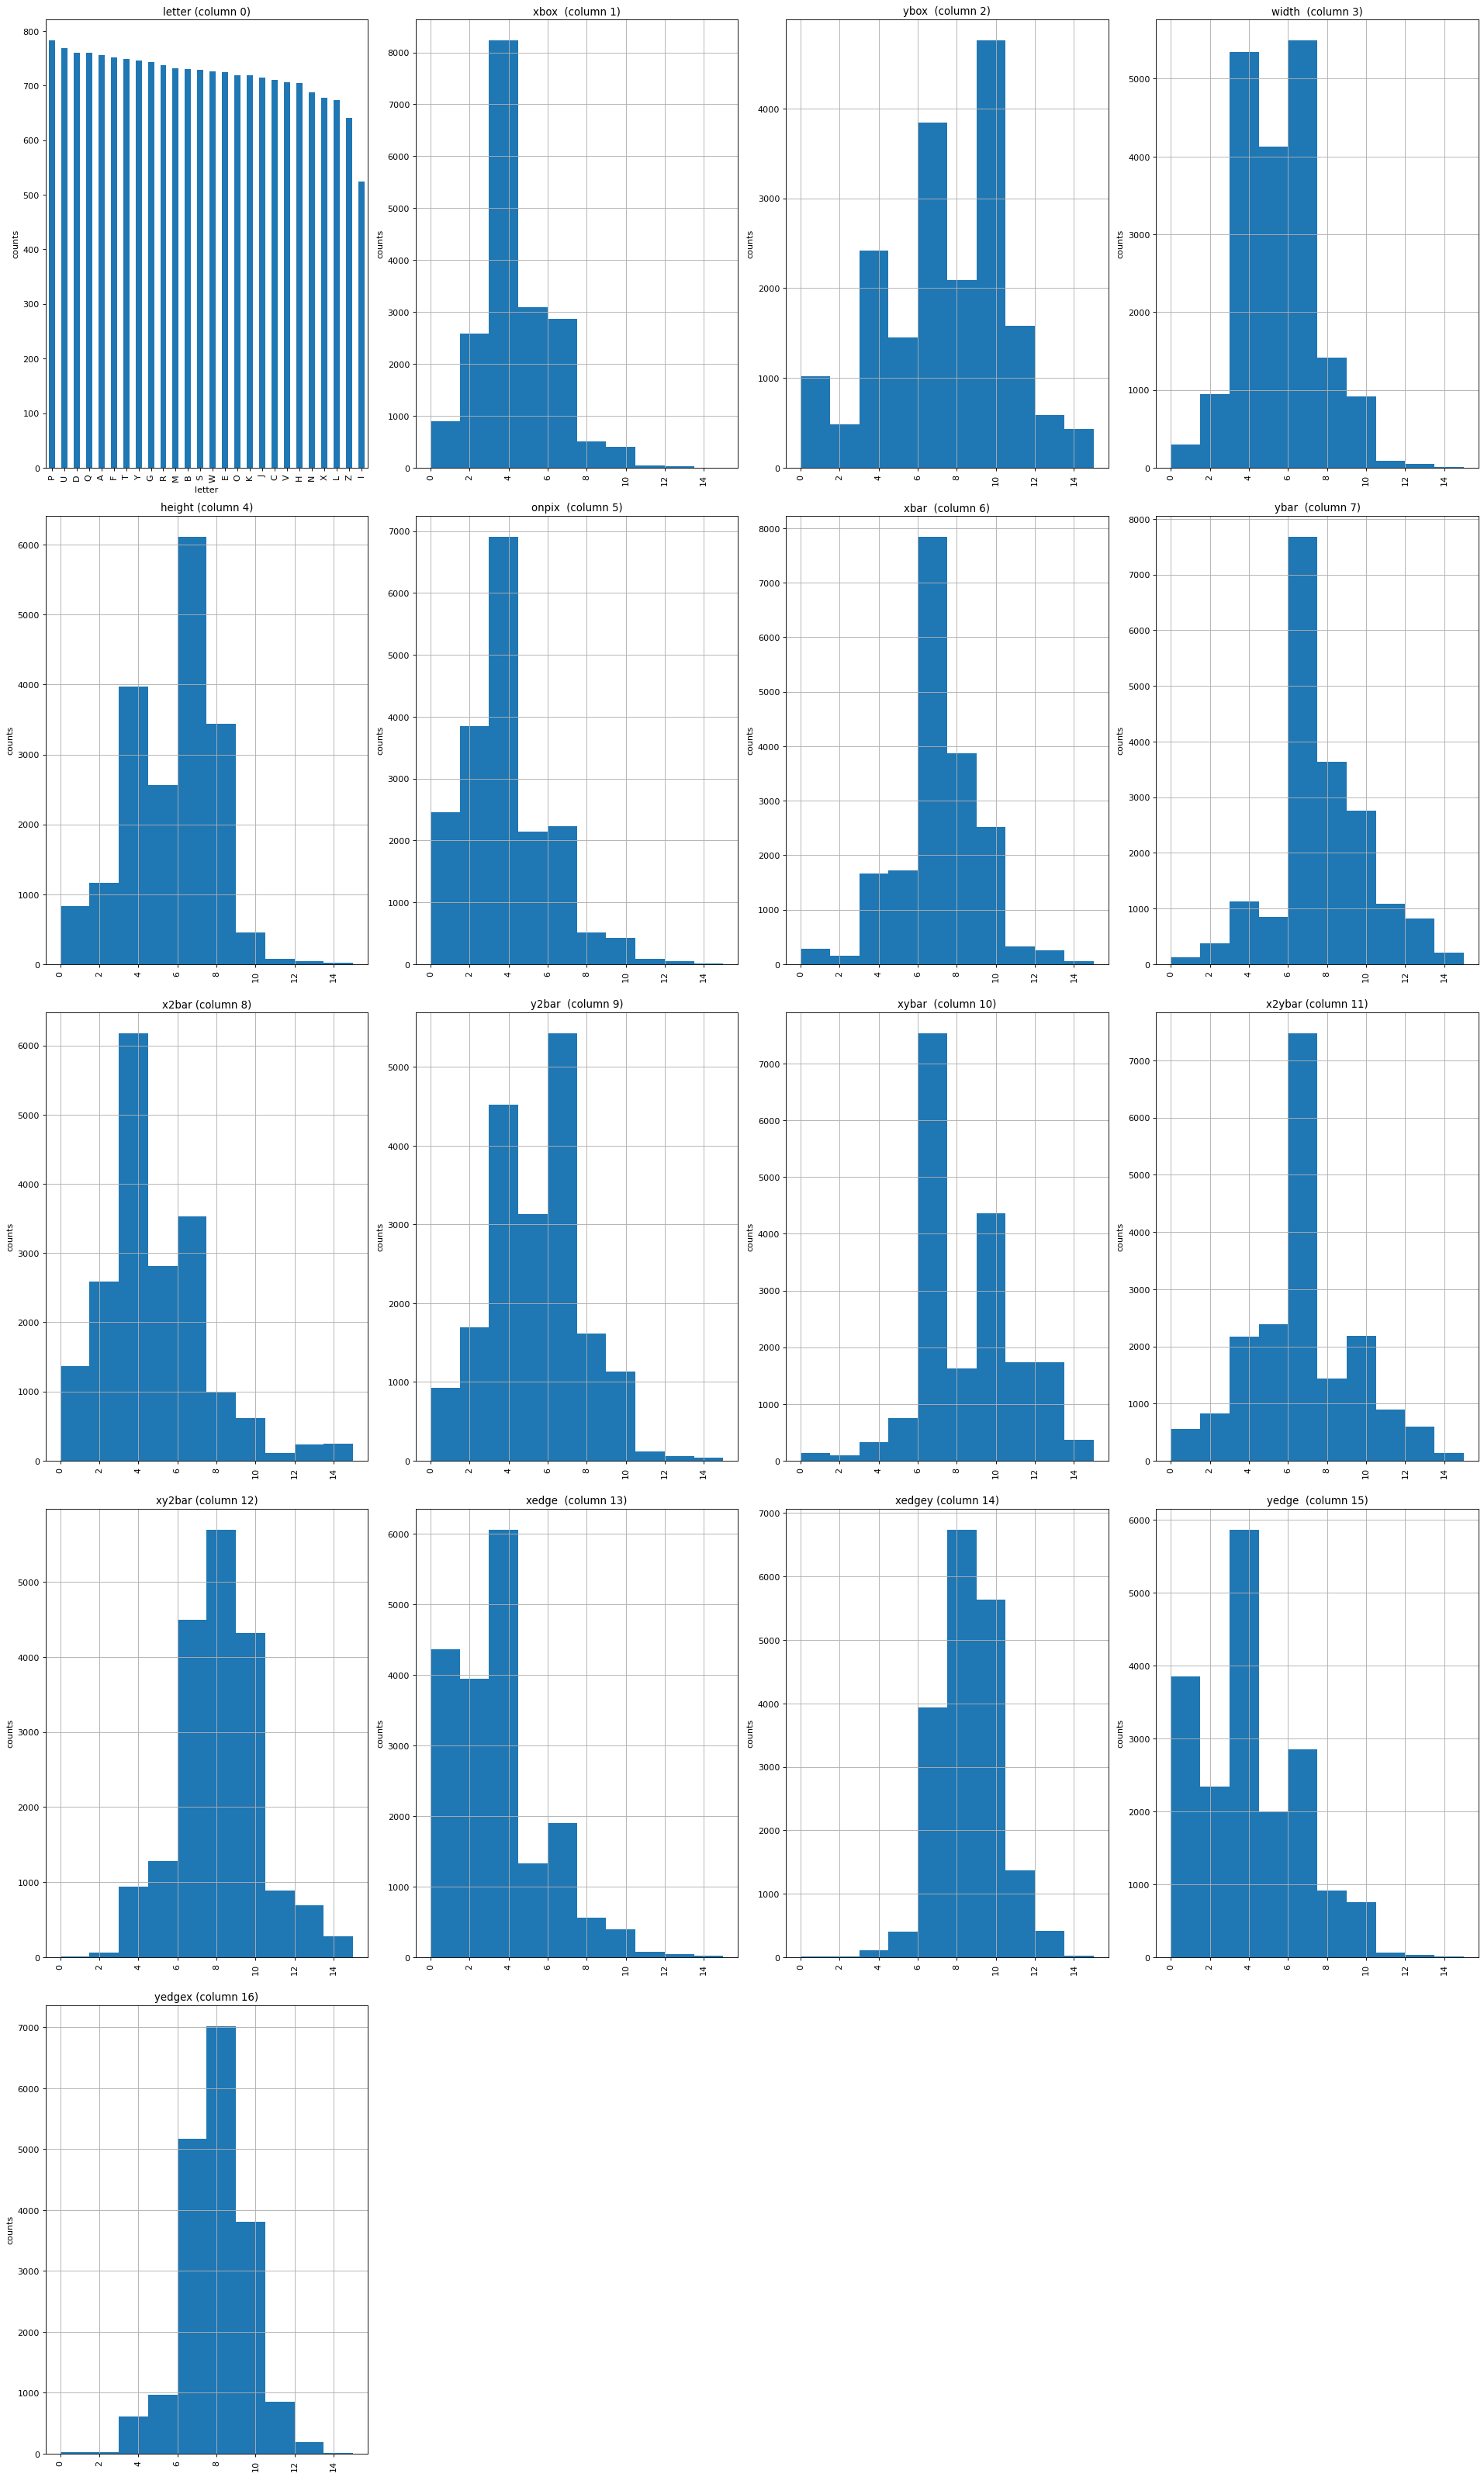

In [20]:
plt.figure(num=None, figsize=(24, 40), dpi=80, facecolor='w', edgecolor='k')
for i in range(df_cleaned.shape[1]):
    plt.subplot(5, 4, i + 1)
    columnDf = df_cleaned.iloc[:, i]
    if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
        valueCounts = columnDf.value_counts()
        valueCounts.plot.bar()
    else:
        columnDf.hist()
    plt.ylabel('counts')
    plt.xticks(rotation=90)
    plt.title(f'{list(df_cleaned)[i]} (column {i})')
plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
plt.show()

# Dimensionality Reduction Using Principal Component Analysis (PCA) 

### Separate our data 

In [21]:
# Separate the target variable
X = df_cleaned.drop(columns=['letter'])
y = df_cleaned['letter']

### Scale columns excluding the target column

In [22]:
# Scale the selected columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

### Apply PCA

In [23]:
# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(data_scaled)

# Check the number of components selected
print("Number of components selected:", pca.n_components_)
# Visualize the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Number of components selected: 12
Explained Variance Ratio: [0.26290478 0.16637983 0.10553048 0.08705231 0.06731289 0.05991311
 0.05659478 0.03822413 0.03689052 0.03221512 0.02657042 0.01771495]


### Explained Variance Ratio by Number of Components

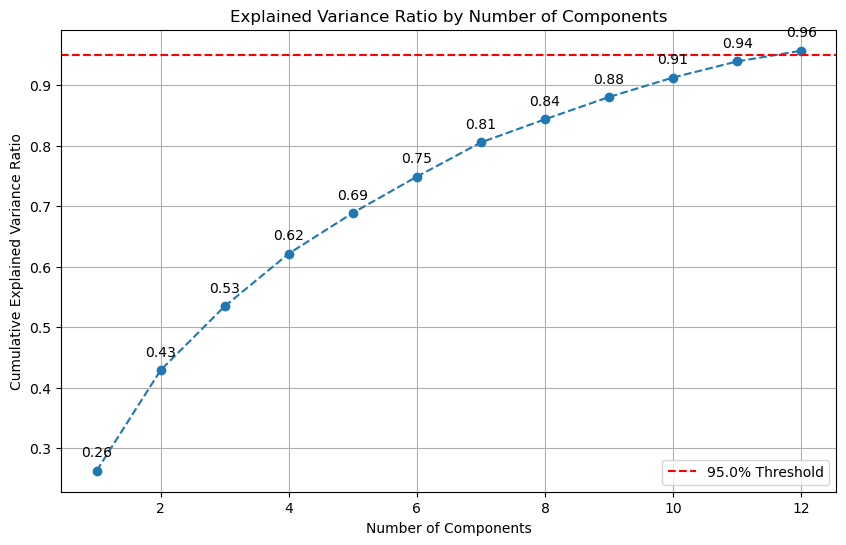

In [24]:
# Compute the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')

# Annotate the plot with explained variance ratio values
for i, ratio in enumerate(cumulative_variance_ratio):
    plt.annotate(f'{ratio:.2f}', (i+1, ratio), textcoords="offset points", xytext=(0, 10), ha='center')

# Add a horizontal line for the threshold
threshold = 0.95  # Adjust as needed
plt.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold*100}% Threshold')

plt.title('Explained Variance Ratio by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()

### Scatter Plot of the First Two Principal Components

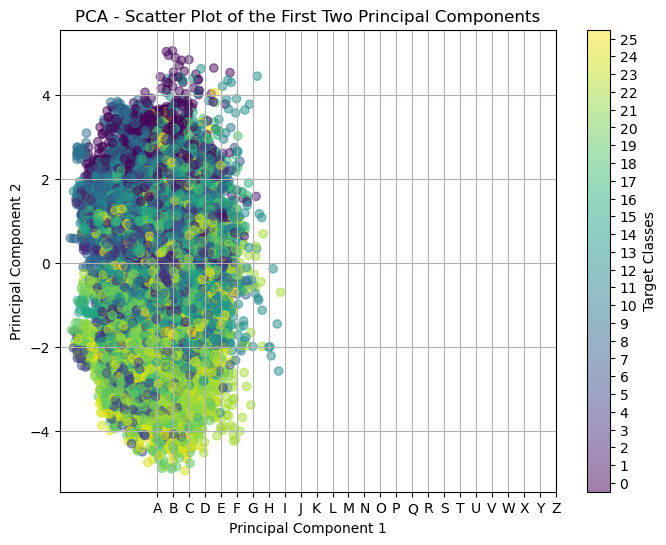

In [25]:
# Convert the target labels to a unique set and assign each a unique integer.
unique_labels = np.unique(y)  # Finds all unique elements in the target array 'y'.
label_to_int = {label: idx for idx, label in enumerate(unique_labels)}  # Maps each unique label to an integer.

# Convert all target labels in 'y' to their corresponding integer labels.
y_int = np.array([label_to_int[label] for label in y])  # Creates a new array of integer labels.

# Begin plotting
plt.figure(figsize=(8, 6))  # Sets the size of the figure to 8 inches wide by 6 inches tall.

# Scatter plot for the first two principal components.
# X_pca is assumed to be the matrix of principal component scores.
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_int, alpha=0.5, cmap='viridis')  # Plots the first two principal components. Uses 'y_int' for color coding based on target class.

# Labeling the axes and title of the plot
plt.xlabel('Principal Component 1')  # Labels the x-axis.
plt.ylabel('Principal Component 2')  # Labels the y-axis.
plt.title('PCA - Scatter Plot of the First Two Principal Components')  # Sets the title of the plot.

# Adding a color bar to the plot for reference.
plt.colorbar(scatter, ticks=range(len(unique_labels)), label='Target Classes')  # Adds a color bar with ticks corresponding to classes.

# Additional styling for the plot
plt.grid(True)  # Enables the grid for better readability of the plot.
plt.clim(-0.5, len(unique_labels) - 0.5)  # Sets the limits for the colors in the color bar to ensure all colors are shown correctly.

# Customizing tick labels for clarity on what each tick represents.
plt.xticks(ticks=np.arange(len(unique_labels)), labels=unique_labels)  # Sets custom tick labels for the x-axis based on unique labels.

# Display the plot
plt.show()  # Renders the plot to the screen.

# Support Vector Machine (SVM)

### Split our data to training and test sets

In [26]:
# Split the dataa into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
# X_pca: Feature matrix after PCA transformation
# y: Target variable array
# test_size=0.2: Allocate 20% of the data as the test set
# random_state=42: Seed for random number generator for reproducibility

# SVM Model1

In [27]:
# Create an SVM model with a linear kernel
svm_model_1 = SVC(kernel='linear')

# Train the SVM model on the training data
svm_model_1.fit(X_train, y_train)

# Use the trained model to predict the labels for the test set
y_pred = svm_model_1.predict(X_test)

# Calculate the accuracy of the model by comparing predicted labels to actual labels
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)

Accuracy: 0.7750401713979647


### The classification_report provides the following metrics for each class:

1. Precision: The proportion of correctly predicted positive instances (true positives) out of all instances predicted as positive (true positives + false positives).
2. Recall: The proportion of correctly predicted positive instances (true positives) out of all actual positive instances (true positives + false negatives).
3. F1-score: The harmonic mean of precision and recall, giving a balance between the two metrics. It is calculated as 2 * (precision * recall) / (precision + recall).
4. Support: The number of actual occurrences of the class in the specified dataset.
5. Accuracy: The proportion of correctly classified instances out of the total instances.

In [28]:
# Assuming y_test and y_pred are the true and predicted labels respectively
report1 = classification_report(y_test, y_pred)

# Print the classification report
print(report1)

              precision    recall  f1-score   support

           A       0.86      0.92      0.89       144
           B       0.77      0.81      0.79       156
           C       0.78      0.81      0.79       147
           D       0.68      0.84      0.75       163
           E       0.77      0.83      0.80       144
           F       0.71      0.82      0.76       146
           G       0.72      0.64      0.68       173
           H       0.65      0.60      0.62       133
           I       0.91      0.74      0.82       108
           J       0.91      0.82      0.86       150
           K       0.71      0.85      0.78       149
           L       0.92      0.86      0.89       147
           M       0.87      0.91      0.89       143
           N       0.89      0.86      0.87       138
           O       0.76      0.60      0.67       131
           P       0.86      0.78      0.82       161
           Q       0.74      0.72      0.73       145
           R       0.71    

### Tests each SVM model with new input data.

In [29]:
# Reshape the provided data into a 2D numpy array
new_data = np.array([[2, 7, 3, 5, 1, 8, 13, 1, 6, 6, 10, 9, 0, 8, 0, 8]])

new_data = pd.DataFrame(new_data)
# Scale the new data using the fitted scaler
new_data_scaled = scaler.transform(new_data)

# Apply PCA to the scaled new data
new_data_pca = pca.transform(new_data_scaled)

# Use the SVM model to predict the letter for the new data
predicted_letter = svm_model_1.predict(new_data_pca)

print("Predicted Letter:", predicted_letter[0])


Predicted Letter: T


C:\Users\Mohamed Bayomey\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# polynomial SVM Model 2

In [30]:
# Create an SVM model with a polynomial kernel of degree 3, regularization parameter C=1.0, and scale gamma
svm_model_2 = SVC(kernel='poly', degree=3, C=1)

# Fit the SVM model to the training data
svm_model_2.fit(X_train, y_train)

# Use the trained model to predict the labels for the test data
y_pred = svm_model_2.predict(X_test)

# Calculate the accuracy of the model by comparing predicted labels to actual labels
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)

Accuracy: 0.8596679164434923


### The classification_report provides the following metrics for each class:

1. Precision: The proportion of correctly predicted positive instances (true positives) out of all instances predicted as positive (true positives + false positives).
2. Recall: The proportion of correctly predicted positive instances (true positives) out of all actual positive instances (true positives + false negatives).
3. F1-score: The harmonic mean of precision and recall, giving a balance between the two metrics. It is calculated as 2 * (precision * recall) / (precision + recall).
4. Support: The number of actual occurrences of the class in the specified dataset.
5. Accuracy: The proportion of correctly classified instances out of the total instances.

In [31]:
# Print the classification report
report2 = classification_report(y_test, y_pred)
print(report2)

              precision    recall  f1-score   support

           A       0.95      0.94      0.95       144
           B       0.80      0.84      0.82       156
           C       0.96      0.84      0.89       147
           D       0.82      0.88      0.85       163
           E       0.85      0.93      0.89       144
           F       0.86      0.92      0.89       146
           G       0.84      0.83      0.83       173
           H       0.72      0.62      0.67       133
           I       0.99      0.86      0.92       108
           J       0.98      0.85      0.91       150
           K       0.96      0.87      0.91       149
           L       0.98      0.89      0.94       147
           M       0.99      0.95      0.97       143
           N       0.90      0.86      0.88       138
           O       0.40      0.96      0.56       131
           P       0.97      0.86      0.91       161
           Q       0.94      0.81      0.87       145
           R       0.86    

### Tests each SVM model with new input data.

In [32]:
# Reshape the provided data into a 2D numpy array
new_data = np.array([[5, 10, 5, 8, 6, 10, 6, 2, 6, 10, 3, 7, 3, 9, 3, 9]])

new_data = pd.DataFrame(new_data)
# Scale the new data using the fitted scaler
new_data_scaled = scaler.transform(new_data)

# Apply PCA to the scaled new data
new_data_pca = pca.transform(new_data_scaled)

# Use the SVM model to predict the letter for the new data
predicted_letter = svm_model_2.predict(new_data_pca)

print("Predicted Letter:", predicted_letter[0])


Predicted Letter: D


C:\Users\Mohamed Bayomey\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# RBF SVM Model 3

In [33]:
# Initialize the SVM classifier with an RBF kernel and C=10
svm_model_3 = SVC(kernel='rbf', C=10)

# Train the SVM classifier
svm_model_3.fit(X_train, y_train)

# Predict on the test data
y_pred_svm = svm_model_3.predict(X_test)

# Calculate the accuracy of the SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.9563470808784146


### The classification_report provides the following metrics for each class:

1. Precision: The proportion of correctly predicted positive instances (true positives) out of all instances predicted as positive (true positives + false positives).
2. Recall: The proportion of correctly predicted positive instances (true positives) out of all actual positive instances (true positives + false negatives).
3. F1-score: The harmonic mean of precision and recall, giving a balance between the two metrics. It is calculated as 2 * (precision * recall) / (precision + recall).
4. Support: The number of actual occurrences of the class in the specified dataset.
5. Accuracy: The proportion of correctly classified instances out of the total instances.

In [34]:
# Print the classification report
report3 = classification_report(y_test, y_pred_svm)
print(report3)

              precision    recall  f1-score   support

           A       0.98      1.00      0.99       144
           B       0.90      0.95      0.92       156
           C       0.97      0.95      0.96       147
           D       0.90      0.98      0.94       163
           E       0.96      0.95      0.96       144
           F       0.90      0.95      0.92       146
           G       0.94      0.94      0.94       173
           H       0.95      0.90      0.93       133
           I       0.96      0.94      0.95       108
           J       0.98      0.95      0.97       150
           K       0.99      0.97      0.98       149
           L       0.99      0.95      0.97       147
           M       0.99      0.99      0.99       143
           N       0.96      0.96      0.96       138
           O       0.94      0.98      0.96       131
           P       0.94      0.96      0.95       161
           Q       0.99      0.96      0.97       145
           R       0.94    

### Tests each SVM model with new input data.

In [35]:
# Reshape the provided data into a 2D numpy array
new_data = np.array([[9, 9, 8, 5, 9, 7, 8, 8, 5, 7, 5, 8, 8, 10, 11, 6]])

new_data = pd.DataFrame(new_data)
# Scale the new data using the fitted scaler
new_data_scaled = scaler.transform(new_data)

# Apply PCA to the scaled new data
new_data_pca = pca.transform(new_data_scaled)

# Use the SVM model to predict the letter for the new data
predicted_letter = svm_model_3.predict(new_data_pca)

print("Predicted Letter:", predicted_letter[0])


Predicted Letter: M


C:\Users\Mohamed Bayomey\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
